# Exploratory Data Analysis using Python
   

In [3]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od

In [8]:
od.download('stackoverflow-developer-survey-2020')

94609408it [00:01, 51210133.82it/s]                                             


16384it [00:00, 63632.80it/s]                                                   


8192it [00:00, 52414.72it/s]                                                    


In [4]:
import os

In [5]:
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_public.csv', 'survey_results_schema.csv', 'README.txt']

In [6]:
import pandas as pd

In [7]:
survey_raw_df=pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [8]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [9]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [10]:
schema_fname= 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [11]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [12]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [ ]:
# Lets start with data cleaning

In [13]:
selected_columns= [
    #Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    #Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    #Employement
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'

]

In [14]:
len(selected_columns)

20

In [15]:
survey_df= survey_raw_df[selected_columns].copy()

In [16]:
schema=schema_raw[selected_columns]

In [17]:
survey_df.shape

(64461, 20)

In [18]:
schema.shape

(20,)

In [19]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [20]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [ ]:
# As there are 2 values which are not in numbers, so lets convert them into numbers


In [21]:
survey_df['Age1stCode']= pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode']= pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro']= pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [22]:
survey_df.Age1stCode.unique()

array([13., 19., 15., 18., 16., 14., 12., 20., 42.,  8., 25., 22., 30.,
       17., 21., 10., 46.,  9.,  7., 11.,  6., nan, 31., 29.,  5., 28.,
       38., 23., 27., 41., 24., 53., 26., 35., 32., 40., 33., 36., 54.,
       48., 56., 45., 44., 34., 39., 51., 68., 50., 37., 47., 43., 52.,
       85., 64., 55., 58., 49., 76., 72., 73., 83., 63.])

In [23]:
survey_df.describe()
# As you can see there are some wrong values in data, like min age is 1 and Max age is 279 which cannot be possible 

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [24]:
# so lets drop there rows which contains worng data
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [25]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [26]:
# lets only take 2 gender for our analysys 
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [27]:
import numpy as np

In [28]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)),np.nan,inplace=True)

In [29]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
5947,Sri Lanka,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,13.0,15.0,6.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;Go;JavaScript;PHP;Python...,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack",45.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
7792,Russian Federation,35.0,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A health science (such as nursing, pharmacy, r...",No,8.0,6.0,5.0,HTML/CSS;JavaScript;Ruby;SQL,Go;HTML/CSS;JavaScript;Ruby;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Developer, full-stack",30.0,Slightly dissatisfied,Industry that I’d be working in;Flex time or a...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
12458,Sweden,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,7.0,17.0,NaN,Assembly;Bash/Shell/PowerShell;C;C++;JavaScrip...,Assembly;Bash/Shell/PowerShell;C;C++;Ruby,Once a year,Play games;Visit Stack Overflow;Panic;Do other...,Student,NaN,NaN,NaN,NaN,NaN,NaN
6231,Jordan,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,16.0,12.0,9.0,HTML/CSS;Java;JavaScript;SQL,NaN,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",50.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Somewhat important
59046,United States,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,8.0,15.0,3.0,C#;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,NaN,Every few months,Call a coworker or friend;Go for a walk or oth...,Employed full-time,"Developer, full-stack;Developer, mobile;Scientist",45.0,Neither satisfied nor dissatisfied,"Industry that I’d be working in;Languages, fra...",Often: 1-2 days per week or more,Not at all important/not necessary
46738,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,20.0,12.0,C#;HTML/CSS;JavaScript;SQL;TypeScript,C#;HTML/CSS;JavaScript;SQL;TypeScript,Once a year,Visit Stack Overflow,Employed full-time,"Developer, full-stack;Engineering manager",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Never,Very important
55316,Germany,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",No,12.0,16.0,8.0,Bash/Shell/PowerShell;C;C++;Java,C;C++,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data scientist or machine learning specialist;...,NaN,Slightly satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Critically important
42785,Russian Federation,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,5.0,2.0,Java;Scala,Haskell;Scala,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed part-time,"Developer, back-end",40.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,NaN
4600,United States,52.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,42.0,35.0,HTML/CSS;JavaScript;PHP;Python,HTML/CSS;JavaScript;PHP;Python,Once every few ye

## Analysis and Visualization  

In [39]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

## 1. Country 

In [32]:
schema.Country

'Where do you live?'

In [33]:
survey_df.Country.nunique()

183

In [34]:
top_countries=survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

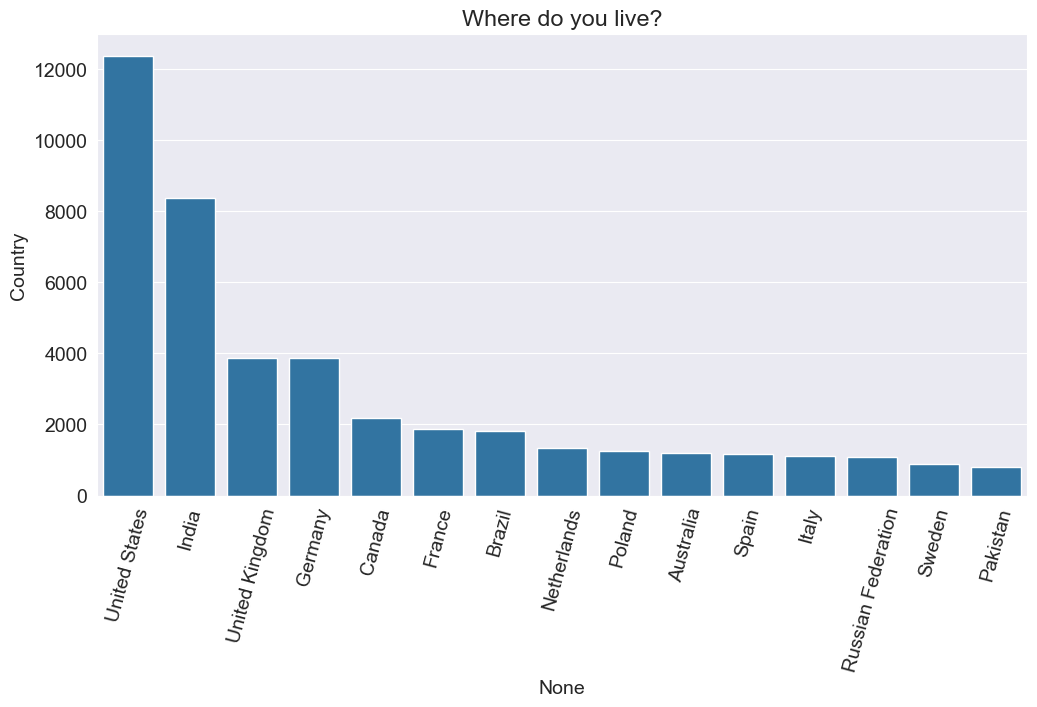

In [40]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

## 2. Age 

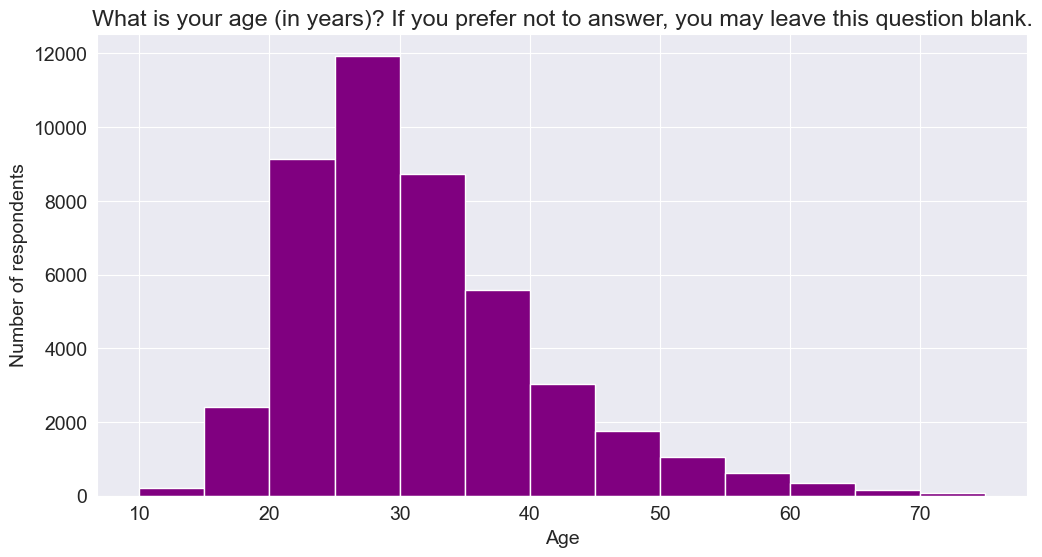

In [42]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

## 3. Gender 

In [43]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [44]:
gender_counts= survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

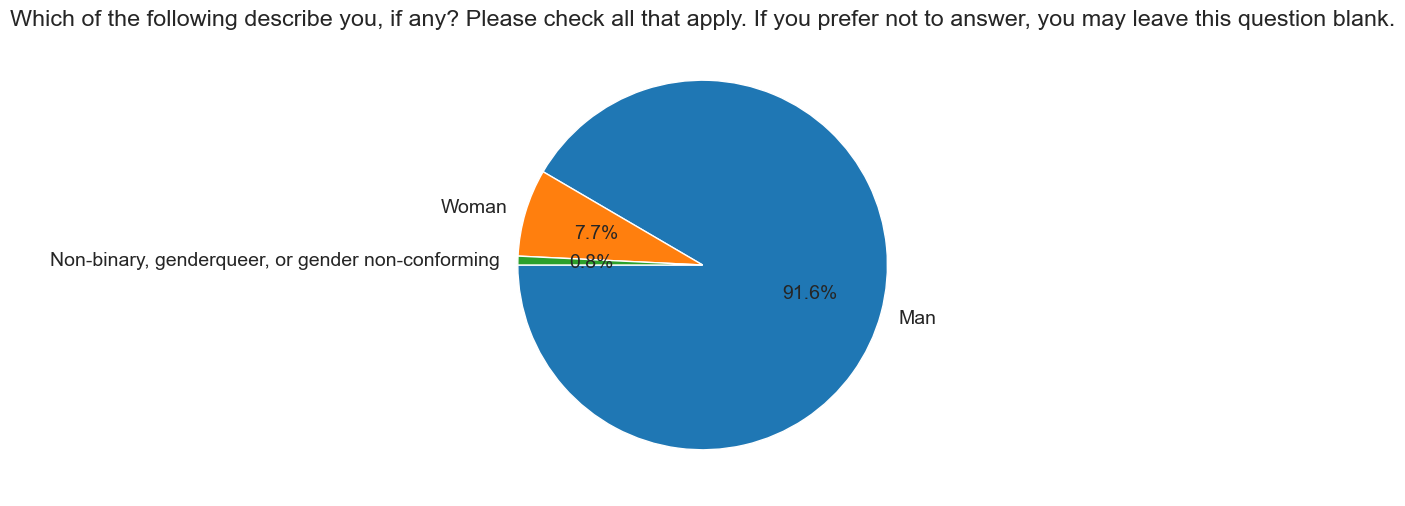

In [46]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

## 4. Education Level 

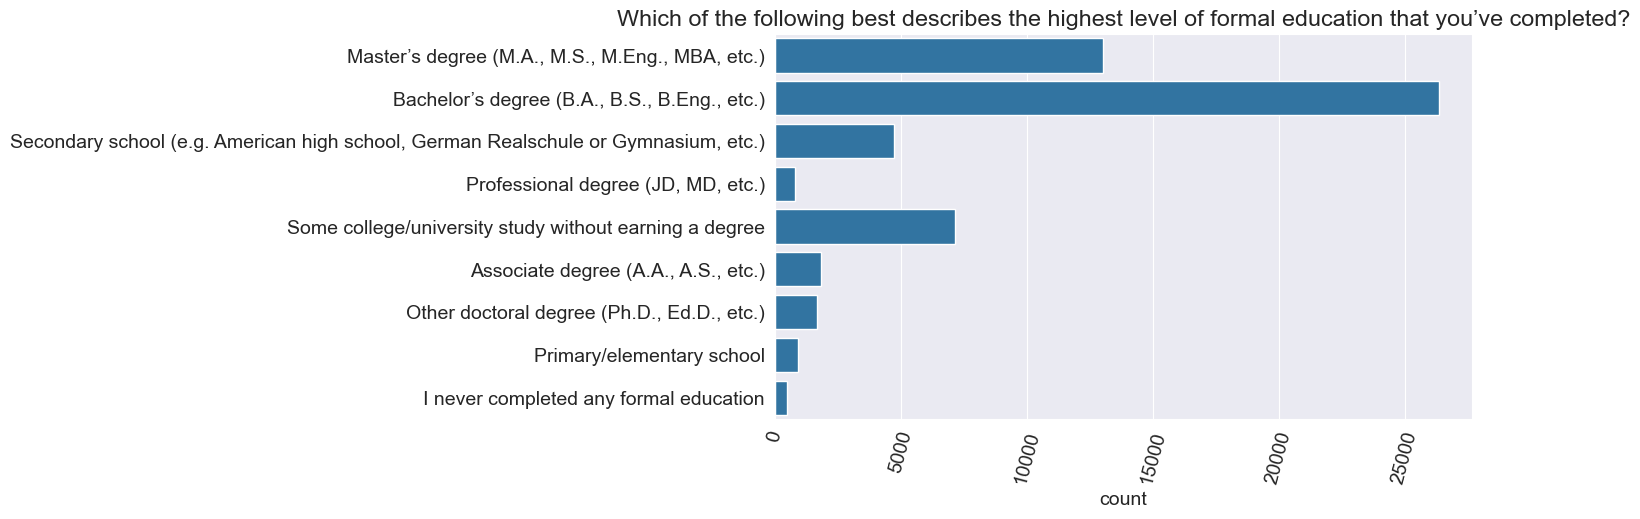

In [47]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);


## 5. Employement 

In [48]:
schema.Employment

'Which of the following best describes your current employment status?'

In [49]:
survey_df.Employment.unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

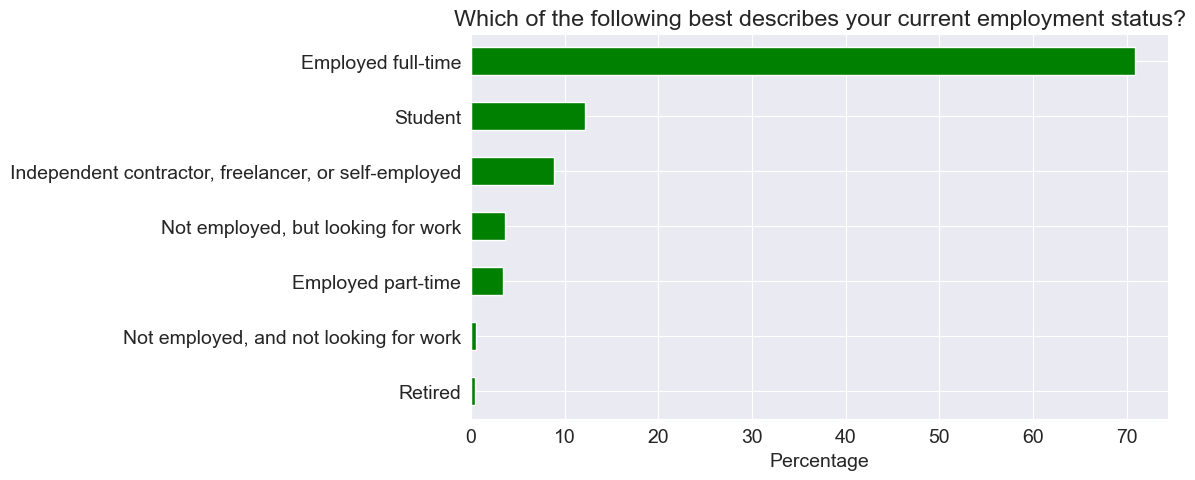

In [52]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh',color='g') 
plt.title(schema.Employment)
plt.xlabel('Percentage');


## 6. DevType 

In [53]:
# What is there is a condition where you can select multiple option.
# If a question have multiple answers, then it will be difficult for a analyst to analyse it. 
# For that lets create a function which will help us to analyse it.

In [54]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [56]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

In [67]:
# Lets create a function
def split_multicolumn(col_series):
    result_df= col_series.to_frame()
    options=[]
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option]= False
            # Mark the value in the option column as True
            result_df.at[idx, option]= True
    return result_df[options]

In [68]:
dev_type_df= split_multicolumn(survey_df.DevType)

/var/folders/4b/kv98cdz11076t51j5dl9gclc0000gn/T/ipykernel_11293/3000378595.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value in col_series[col_series.notnull()].iteritems():


In [69]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
dev_type_totals= dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

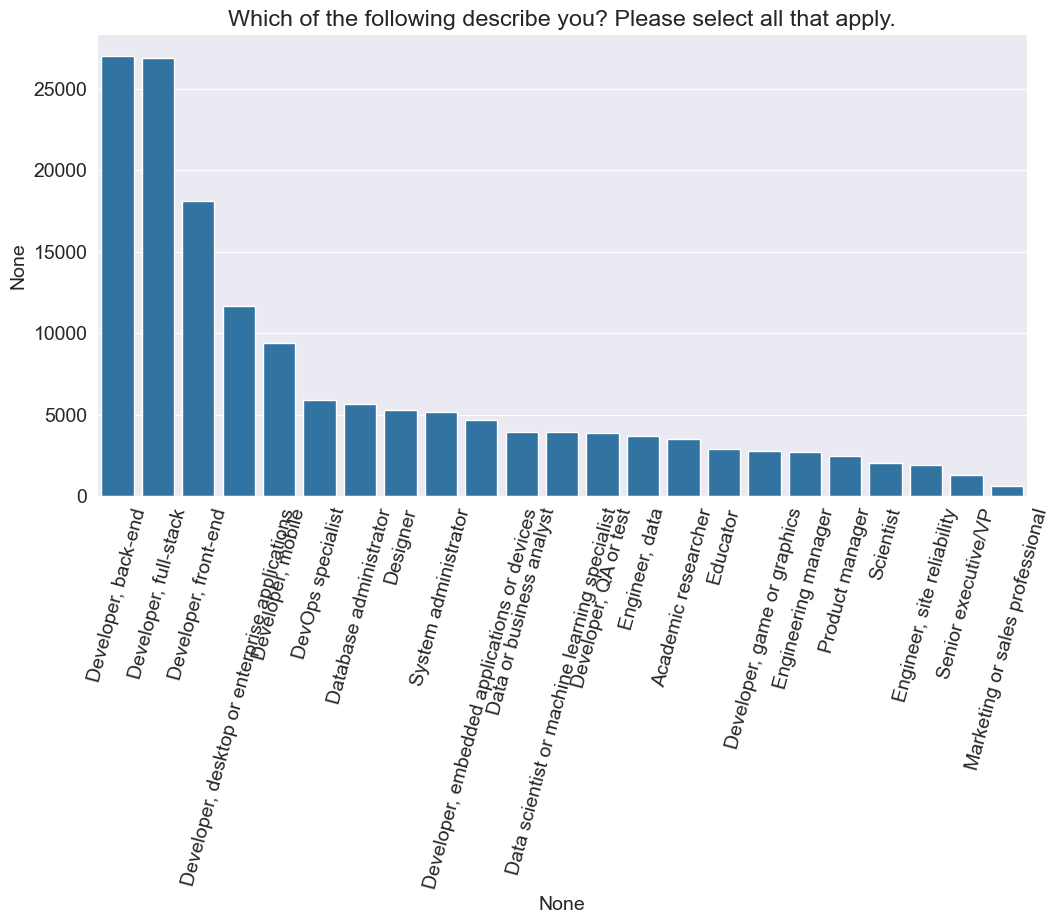

In [71]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.DevType)
sns.barplot(x=dev_type_totals.index, y=dev_type_totals);